## Churn Prediction

In [2]:
## necessary libraries 
import pandas as pd
import numpy as np   # for linear algebra

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## for train test split 
from sklearn.model_selection import train_test_split

# for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:

df.shape

(7043, 21)

## EDA part

In [91]:
## start with finding missing values 

In [92]:
df.isnull().sum()
## since there is no null vaues so we can explore the dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
df["Churn"].value_counts()  

No     5174
Yes    1869
Name: Churn, dtype: int64

In [96]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [97]:
columns = df.columns

for col in columns:
    print(df[col].value_counts().shape)

(7043,)
(2,)
(2,)
(2,)
(2,)
(73,)
(2,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(2,)
(4,)
(1585,)
(6531,)
(2,)


In [98]:
## above query showed me the no of classes play role in categorical variales 
## some has 2 classes 
## & some has 3 classes

## 7043 repersent the unique customer id for each customer which is equal to the no of rows in dataset
## last 2nd and last 3rd is for total charges and monthly charges


## 4 represent the 4 payment mathods
## /i.e

df['PaymentMethod'].value_counts()

# so this is not a categorical variable


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [112]:
columns = df.columns

binary_cat_columns = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cat_columns.append(col)

binary_cat_columns  # binary categorial columns 

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [100]:
## categorical values having more than 3 variables are  ( multiple categorical column )

multiple_cat_columns = []
for col in columns:
    if df[col].value_counts().shape[0] in range(3, 5):
        multiple_cat_columns.append(col)
        
multiple_cat_columns 

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

## Binary Categorical Features

#### < univarent analysis >

In [101]:
df['gender'].value_counts()  ## balenced male and female data

Male      3555
Female    3488
Name: gender, dtype: int64

In [103]:
df['SeniorCitizen'].value_counts()   ## less SeniorCitizen has participation in telicom service

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [104]:
df["PhoneService"].value_counts()  ## ~90% are Phone Service user

Yes    6361
No      682
Name: PhoneService, dtype: int64

### Visualizing the univarient analysis of binary categorical columns 

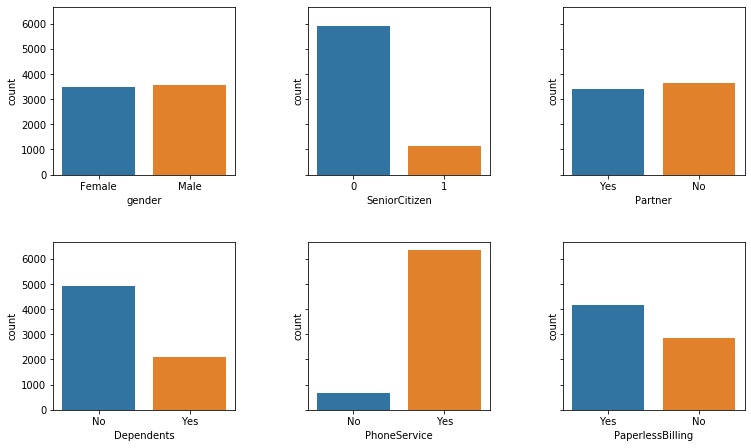

In [105]:
fig, axis = plt.subplots(2, 3, figsize = (12, 7), sharey = True)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

sns.countplot(df['gender'],  ax = axis[0,0])
sns.countplot(df['SeniorCitizen'],ax = axis[0,1])
sns.countplot(df['Partner'], ax = axis[0,2])
sns.countplot(df['Dependents'], ax = axis[1,0])
sns.countplot(df['PhoneService'], ax = axis[1,1])
sns.countplot(df['PaperlessBilling'], ax = axis[1,2])
plt.show()


In [ ]:
## There is high unbalence between SeniorCitizen and the Phone Services
## Most of the users are Phone Service Users and Less No of Senior Citizen users present 

## Now checking how this features affect out target column (Churn)

## but before that we have to do feature engineering on target column (Churn)
## We will use label encoding technique to convert target column into numerical column

In [107]:
# Label encoading 
churn_numeric = {"Yes":1, "No":0}
df['Churn'].replace(churn_numeric, inplace = True)

In [109]:
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [113]:
binary_cat_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

### < multivarient analysis >

In [125]:
a = binary_cat_columns
a.pop()

for col in a:
    print("<< '{}' and 'Churn' >>".format(col))
    print(df[["Churn", col]].groupby([col]).mean())
    print("--"*30, end ="\n")
    print(" ")
    

<< 'gender' and 'Churn' >>
           Churn
gender          
Female  0.269209
Male    0.261603
------------------------------------------------------------
 
<< 'SeniorCitizen' and 'Churn' >>
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
------------------------------------------------------------
 
<< 'Partner' and 'Churn' >>
            Churn
Partner          
No       0.329580
Yes      0.196649
------------------------------------------------------------
 
<< 'Dependents' and 'Churn' >>
               Churn
Dependents          
No          0.312791
Yes         0.154502
------------------------------------------------------------
 
<< 'PhoneService' and 'Churn' >>
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
------------------------------------------------------------
 
<< 'PaperlessBilling' and 'Churn' >>
                     Churn
PaperlessBilling          
No                0.163301
Ye

In [126]:
### From above Analysis -->

### 1] Average Churn Rate form males and females is approximately same and Ratio of male and female is colse to 1
###    so 'gender' feature dows not bring a valuabel prediction.

### 2] 

## Multiple class Categorical Columns 

In [52]:
multiple_cat_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [129]:
df['InternetService'].value_counts()   ## Shows three types of Internet Service available 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

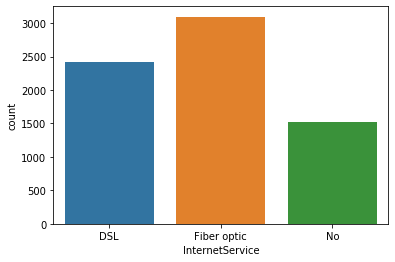

In [131]:
sns.countplot(df['InternetService'])
plt.show()

In [132]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [133]:
for col in multiple_cat_columns:
    print("-->",col,"<--")
    print(" ")
    
    print(df[col].value_counts())
    print("--"*30)
    print(" ")

--> MultipleLines <--
 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------------------------------------
 
--> InternetService <--
 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------------------------------------
 
--> OnlineSecurity <--
 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------------------------------------------------
 
--> OnlineBackup <--
 
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
------------------------------------------------------------
 
--> DeviceProtection <--
 
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
------------------------------------------------------------


In [78]:
multiple_cat_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

### Visualizing the univarient analysis of multipal categorical columns 

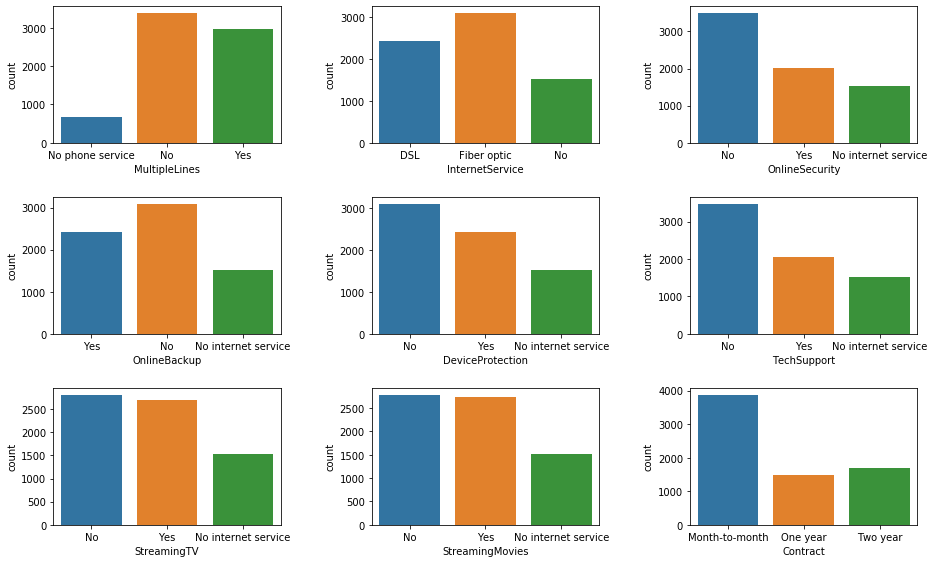

In [81]:
fig, axis = plt.subplots(3,3,figsize= (15, 9))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

sns.countplot(df['MultipleLines'], ax = axis[0,0])
sns.countplot(df['InternetService'], ax = axis[0,1])
sns.countplot(df['OnlineSecurity'], ax = axis[0,2])
sns.countplot(df['OnlineBackup'], ax = axis[1,0])
sns.countplot(df['DeviceProtection'], ax = axis[1,1])
sns.countplot(df['TechSupport'], ax = axis[1,2])
sns.countplot(df['StreamingTV'], ax = axis[2,0])
sns.countplot(df['StreamingMovies'], ax = axis[2,1])
sns.countplot(df['Contract'], ax = axis[2,2])

plt.show()

In [ ]:
## Result from above analysis -->

## 1] Month-to-Month users are relatively high than One year contract and Two Year
## 2] 

In [134]:
## cheaking how these features affect on target variable 'Churn'

In [136]:
df[['MultipleLines', 'Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [137]:
df[['InternetService', 'Churn']].groupby(["InternetService"]).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [ ]:
## Fiber Optic service users has strong correlation with churn 
## Number shows, more fiber optics users are churning 
## so this it potentail column in model prediction

In [141]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [143]:
df[['OnlineSecurity', "Churn"]].groupby(["OnlineSecurity"]).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [142]:
## Users who has taken the Online Security are less likely to churn 
## so this if also the potential column form ml prediction

In [145]:
df[['OnlineBackup', "Churn"]].groupby(["OnlineBackup"]).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [82]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

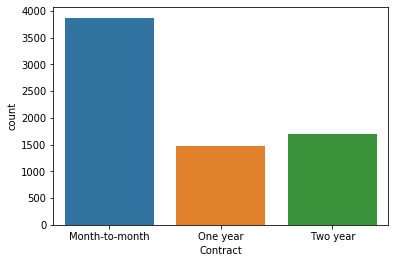

In [146]:
sns.countplot(df["Contract"] )

In [147]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Analyzing Continious Variables

Continious Variables are : MonthlyCharges, TotalCharges, tenure


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [169]:
df["TotalCharges"]= pd.to_numeric(df["TotalCharges"],errors='coerce')
## whenever there is error that value was replaced witn np.NaN

In [171]:
df['TotalCharges'].isnull().sum()
## 11 places got error 

11

In [172]:
## filled Nan Values with [ MonthleyCharges * tenure ]
df['TotalCharges'].fillna(df["MonthlyCharges"]*df["tenure"], inplace = True)

In [173]:
df['TotalCharges'].isnull().sum()
## no null values

0

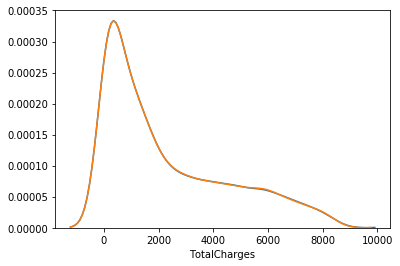

In [179]:
sns.distplot(df["TotalCharges"], hist= False)
sns.distplot(df['MonthlyCharges']*df['tenure'], hist = False)

## It is fully overlapping 
## so we can remove Total Charges Column 

In [180]:
## Now we are left witn only two Continious Numerical columns == tenure and MonthlyCharges

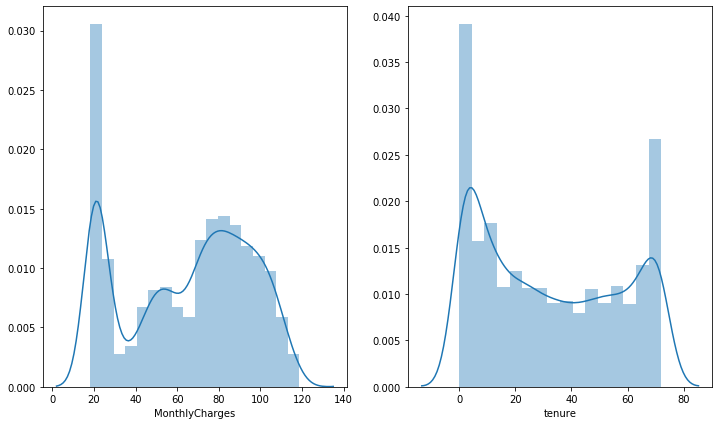

In [181]:
fig, axis = plt.subplots(1, 2, figsize=(12, 7))

sns.distplot(df['MonthlyCharges'], ax = axis[0])
sns.distplot(df['tenure'], ax = axis[1])

In [182]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
## so we can drop ["CustomerID", "gender","PhoneService", "TotalCharges", "Contract"]

In [184]:
no_req = ["customerID", "gender","PhoneService", "TotalCharges", "Contract"]
df.drop(no_req, axis = 1, inplace = True)

## Data PreProcessing 

In [197]:
cat_col = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod', ]
print(len(cat_col))

13


In [192]:
## So converting our categorical columns into numerical columns
## One Hot Encoding Technique using pandas get_dummies function 

dummy_col = pd.get_dummies(df, columns =cat_col, drop_first = True)

In [195]:
print(dummy_col.shape)
dummy_col.head()

(7043, 26)


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
